<table style='border: 3px solid black; width: 100%;'>
    <tr>
        <th style='width: 5%;'>&nbsp;</th>
        <th style='width: 15%;'><img src='../resources/images/amanita_muscaria.png'></th>
        <th><center><h1 style='font-size: 38px;'>[ MUSHROOM Project ]</h1></center></th>
        <th style='width: 5%'>&nbsp;</th>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>Project type: <span style='color: blue;'><strong>Image Classification</strong></span></td>        
        <td>&nbsp;</td>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>Autors: </span><strong><span style='color: blue;'>Sabah ABIH</span> / <span style='color: blue;'>Olivier CONSTANTIN</span> / <span style='color: blue;'>David CHARLES-ELIE-NELSON</span></strong></td>
        <td>&nbsp;</td>
    </tr>
</table>

<hr style="border-width: 4px ; border-color: #0C22D7">

# Modelisation: ---( TRAIN MODEL )---</h1></td>

<hr style="border-width: 4px ; border-color: #0C22D7">

# Initialization

## Import Standard Libraries

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Import Standard Libraries
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

import os
import sys

# Time
import pytz
from time import time

# Math
import math

# Regex
import re

# JSON
import json

# Numpy
import numpy as np
print('NumPy: ', np.__version__)

# Pandas
import pandas as pd
print('Pandas: ', pd.__version__)

# TensorFlow
import tensorflow as tf
print('TensorFlow: ', tf.__version__)

# Keras backend
import keras.backend as kb

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Seaborn
import seaborn as sns
print('Seaborn: ', sns.__version__)

# Scikit-Learn
import sklearn as skl
print('Scikit-Learn: ', skl.__version__)

NumPy:  1.19.5
Pandas:  1.1.5
TensorFlow:  2.5.0
Seaborn:  0.11.1
Scikit-Learn:  0.22.2.post1


## Settings

### Settings

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Settings
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

# Time
LOCAL_TIMEZONE = pytz.timezone('Europe/Paris')


# ~~~ GENUS SELECTION ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

MAX_IMAGES_PER_GENUS   = 1000         # 100 | 500 | 1000 | 2000 | 2500
TRAIN_BATCH_SIZE       = None         # If None then the batch_size that has been used for the hyperparameter tuning 
                                      # will be used
VALID_BATCH_SIZE       = None         # If None then the batch_size that has been used for the hyperparameter tuning 
                                      # will be used


# ~~~ TRAIN ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

EPOCHS                = 100


# ~~~ TEST DATASET ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

TEST_BATCH_SIZE       = 32           # A non-None value is expected !
TEST_SHUFFLE          = False
TEST_SEED             = None


### Path Settings

In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Path Settings
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

class PathSettings():
    
    def __init__(self,
            gdriveMountPoint    = None 
        ,   projectRootPath     = None
        ,   srcPath             = None
        ,   datasourcePath      = None
        ,   datasourceName      = None
        ,   modelOutputRootPath = None
        ,   imageRootDir        = None
    ):
        self.value = dict(
                GOOGLE_DRIVE_MOUNT_POINT = gdriveMountPoint
            ,   PROJECT_ROOT_PATH        = projectRootPath
            ,   SRC_PATH                 = srcPath
            ,   DATASOURCE_PATH          = datasourcePath
            ,   DATASOURCE_NAME          = datasourceName
            ,   MODEL_OUTPUT_ROOT_PATH   = modelOutputRootPath
            ,   IMAGE_ROOT_DIR           = imageRootDir
        )
    
    
    def getSettings(self):
        return self.value

    
    def get(self, pathname):
        if pathname:
            return self.value.get(pathname.upper())
        else:
            return None
        
        
    def add(self, pathname, value, overwrite = False):
        if overwrite is None:
            overwrite = False
        if pathname not in self.getPathnames() or overwrite:
            self.value[pathname.upper()] = value
        else:
            raise KeyError(f'Unable to add the path: pathname "{pathname}" already exists and <overwrite> parameter is set to False.')
            
            
    def getPathnames(self):
        if self.value:
            return self.value.keys()
        else:
            return None
    

# ~~~ Setting paths according the environment name
#
PATH_SETTINGS = PathSettings(
        gdriveMountPoint    = '/content/drive'
    ,   projectRootPath     = '/content/drive/MyDrive/Mushroom_project'
    ,   srcPath             = '/content/drive/MyDrive/Mushroom_project/repo_git/src'
    ,   datasourcePath      = '/content/drive/MyDrive/work/Oliv'
    ,   datasourceName      = 'mushroomObserver'
    ,   modelOutputRootPath = '/content/drive/MyDrive/work/dad/output'
    ,   imageRootDir        = '/content/drive/MyDrive/work/Oliv/images'
)

# Specific initialization for GOOGLE COLAB platform
#
# Import Libraries
from google.colab import drive
# For Google Colab only !
gdriveMountPath = PATH_SETTINGS.get('GOOGLE_DRIVE_MOUNT_POINT')
if gdriveMountPath:
    # Mount the google drive if not already done
    if not os.path.isdir(gdriveMountPath):
        drive.mount(gdriveMountPath)
        print('Google drive mounted !')
else:
    raise Error('Failed to retrieve the Google Drive mount point path !')


Mounted at /content/drive
Google drive mounted !


## Initialization for Custom Libraries

In [4]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Initialization for Custom Librairies
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

# Retrieving paths
srcDir = PATH_SETTINGS.get('SRC_PATH')

if srcDir and os.path.isdir(srcDir):
    libDir = os.path.join(srcDir, 'lib')
    if libDir not in sys.path:
        sys.path.append(libDir)
        print(f'INFO: Project directory added to PYTHONPATH: {libDir}')
else:
    raise Error('Invalid value for variable <libDir>')

INFO: Project directory added to PYTHONPATH: /content/drive/MyDrive/Mushroom_project/repo_git/src/lib


## User Inputs

In [5]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# User inputs
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

HP_TUNING_OUTPUT_PATH = input('Enter the directory path that contains the output of hyperparameter tuning results:')

#
# Validating user inputs
#

# HP_TUNING_OUTPUT_PATH
if not HP_TUNING_OUTPUT_PATH:
    raise ValueError('The parameter <HP_TUNING_OUTPUT_PATH> is not set. Please set it and try again.')
if not os.path.isdir(HP_TUNING_OUTPUT_PATH):
    raise FileNotFoundError(f'Directory not found: {HP_TUNING_OUTPUT_PATH}')

print('User inputs: [ OK ]')

Enter the directory path that contains the output of hyperparameter tuning results:/content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0001
User inputs: [ OK ]


# Load hyperparameter tuning results

## Load context.json file

In [6]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Load context.json file
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

JSON_FILE = 'context.json'

filePath = os.path.join(HP_TUNING_OUTPUT_PATH, JSON_FILE)

# Ensure that the file exists
if not os.path.isfile(filePath):
    raise FileNotFoundError(f'File not found: {filePath}')

# Load the file
with open(filePath) as jsonFile:
    data = json.load(jsonFile)
print(f'File loaded successfully: "{JSON_FILE}"')

CONTEXT = data

# Display content
print('\nContent:')
print(json.dumps(CONTEXT, indent = 3))

File loaded successfully: "context.json"

Content:
{
   "image_root_dir": "/content/drive/MyDrive/work/Oliv/images",
   "nb_classes": 10,
   "classes": [
      "Leccinum",
      "Hygrocybe",
      "Armillaria",
      "Boletus",
      "Cantharellus",
      "Tylopilus",
      "Cortinarius",
      "Tricholoma",
      "Suillus",
      "Ganoderma"
   ],
   "model_name": "EfficientNetB0",
   "image_generators": {
      "train": {
         "featurewise_center": false,
         "samplewise_center": false,
         "featurewise_std_normalization": false,
         "samplewise_std_normalization": false,
         "zca_whitening": false,
         "rotation_range": 90,
         "width_shift_range": 0.2,
         "height_shift_range": 0.2,
         "brightness_range": [
            0.2,
            1.0
         ],
         "shear_range": 0.2,
         "zoom_range": 0.3,
         "channel_shift_range": 0.0,
         "fill_mode": "constant",
         "cval": 0.0,
         "horizontal_flip": true,
     

## Load best_trial.json file

In [7]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Load best_trial.json file
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

JSON_FILE = 'best_trial.json'

filePath = os.path.join(HP_TUNING_OUTPUT_PATH, 'best', JSON_FILE)

# Ensure that the file exists
if not os.path.isfile(filePath):
    raise FileNotFoundError(f'File not found: {filePath}')

# Load the file
with open(filePath) as jsonFile:
    data = json.load(jsonFile)
print(f'File loaded successfully: "{JSON_FILE}"')

BEST_TRIAL = data

# Display content
print('\nContent:')
print(json.dumps(BEST_TRIAL, indent = 3))

File loaded successfully: "best_trial.json"

Content:
{
   "tuner_id": "0002",
   "trial_id": "221b522bb262f801c4c0eb23cc127e17",
   "score_name": "val_accuracy",
   "score_direction": "max",
   "score": 0.559374988079071
}


## Load best_hyperparameters.json file

In [8]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Load best_hyperparameters.json file
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

JSON_FILE = 'best_hyperparameters.json'

filePath = os.path.join(HP_TUNING_OUTPUT_PATH, 'best', JSON_FILE)

# Ensure that the file exists
if not os.path.isfile(filePath):
    raise FileNotFoundError(f'File not found: {filePath}')

# Load the file
with open(filePath) as jsonFile:
    data = json.load(jsonFile)
print(f'File loaded successfully: "{JSON_FILE}"')

BEST_HYPERPARAMETERS = data

# Display content
print('\nContent:')
print(json.dumps(BEST_HYPERPARAMETERS, indent = 3))

File loaded successfully: "best_hyperparameters.json"

Content:
{
   "pooling": "avg",
   "num_dense_layers": 4,
   "dense_units": 512,
   "dense_activation": "LeakyReLU",
   "dense_weigths_initializer": "GlorotUniform",
   "dense_biases_initializer": "Zeros",
   "dense_use_batchnorm": 1,
   "dropout_rate": 0.6000000000000001,
   "classifier_activation": "softmax",
   "learning_rate": 0.0035840263888013706,
   "optimizer": "adamax",
   "tuner/epochs": 2,
   "tuner/initial_epoch": 0,
   "tuner/bracket": 1,
   "tuner/round": 0
}


# Settings

In [9]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Settings
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

# Define settings from results that have just been loaded

MODEL_FILEPATH = os.path.join(HP_TUNING_OUTPUT_PATH, 'best', 'model', 'best_model.h5')



# ~~~ GENUS SELECTION ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

GENUS_SELECTION_METHOD = 'BY_NAMES'
CLASS_NAMES            = CONTEXT.get('classes')     # list that sould contain the genus names to consider if 
NB_CLASSES             = CONTEXT.get('nb_classes')  # GENUS_SELECTION_METHOD is set to 'BY_NAMES'

# verification
if NB_CLASSES != len(CLASS_NAMES):
    raise Exception('An error occurred while retrieving the class names the classifier must consider. Please contact the administrator.')

print('[INFO]: Genus selection:')
print(f'     nb_classes: {NB_CLASSES}')
print(f'   classe names: {CLASS_NAMES}')


# ~~~ TUNER ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

TUNER_ID = int(BEST_TRIAL.get('tuner_id'))
if TUNER_ID is None:
    raise Exception('Unable to retrieve <TUNER_ID> from context file. Please contact the administrator.')
TUNER_CONTEXT = CONTEXT.get('per_tuner')[TUNER_ID]
if TUNER_CONTEXT is None:
    raise Exception('Unable to retrieve <TUNER_CONTEXT> from context file. Please contact the administrator.')

# SPLIT SETTINGS
SPLIT_SETTINGS = TUNER_CONTEXT.get('split')
if SPLIT_SETTINGS is None:
    raise Exception('Unable to retrieve <SPLIT_SETTINGS> from context file. Please contact the administrator.')
SPLIT_TEST_RATIO  = SPLIT_SETTINGS.get('test_ratio')
SPLIT_VALID_RATIO = SPLIT_SETTINGS.get('valid_ratio')
SPLIT_SEED_1      = SPLIT_SETTINGS.get('seed_1')
SPLIT_SEED_2      = SPLIT_SETTINGS.get('seed_2')
if SPLIT_TEST_RATIO is None or not isinstance(SPLIT_TEST_RATIO, float):
    raise ValueError(f'Invalid value for <SPLIT_TEST_RATIO> parameter: a float value is expected: current value: {SPLIT_TEST_RATIO}')
if SPLIT_VALID_RATIO is None or not isinstance(SPLIT_VALID_RATIO, float):
    raise ValueError(f'Invalid value for <SPLIT_VALID_RATIO> parameter: a float value is expected: current value: {SPLIT_VALID_RATIO}')
if SPLIT_SEED_1 is None or not isinstance(SPLIT_SEED_1, int):
    raise ValueError(f'Invalid value for <SPLIT_SEED_1> parameter: an integer value is expected: current value: {SPLIT_SEED_1}')
if SPLIT_SEED_2 is None or not isinstance(SPLIT_SEED_2, int):
    raise ValueError(f'Invalid value for <SPLIT_SEED_2> parameter: an integer value is expected: current value: {SPLIT_SEED_2}')


# ~~~ DATASET SETTINGS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

print('\nDATASET SETTINGS:')

DATASET_SETTINGS = TUNER_CONTEXT.get('dataset_settings')
if DATASET_SETTINGS is None:
    raise Exception('Unable to retrieve <DATASET_SETTINGS> from context file. Please contact the administrator.')

# TRAIN dataset settings
TRAIN_DATASET_SETTINGS = DATASET_SETTINGS.get('train')
VALID_DATASET_SETTINGS = DATASET_SETTINGS.get('valid')

# BATCH_SIZE
if TRAIN_BATCH_SIZE is None:
    TRAIN_BATCH_SIZE = int(TRAIN_DATASET_SETTINGS.get('batch_size'))
    if TRAIN_BATCH_SIZE is None:
        raise Exception('Unable to retrieve <TRAIN_BATCH_SIZE> from context file. Please contact the administrator.')
if VALID_BATCH_SIZE is None:
    VALID_BATCH_SIZE = int(VALID_DATASET_SETTINGS.get('batch_size'))
    if VALID_BATCH_SIZE is None:
        raise Exception('Unable to retrieve <VALID_BATCH_SIZE> from context file. Please contact the administrator.')
print(f'   train_batch_size: {TRAIN_BATCH_SIZE}')
print(f'   valid_batch_size: {VALID_BATCH_SIZE}')

# INPUT_SHAPE
INPUT_SHAPE = TRAIN_DATASET_SETTINGS.get('target_size')

COLOR_MODE = TRAIN_DATASET_SETTINGS.get('color_mode')


# ~~~ IMAGE GENERATORS SETTINGS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

print('\nIMAGE GENERATORS SETTINGS:')

IMAGE_GENERATOR_SETTINGS = CONTEXT.get('image_generators')

if IMAGE_GENERATOR_SETTINGS is None:
    raise Exception('Unable to retrieve <IMAGE_GENERATOR> from context file. Please contact the administrator.')

TRAIN_IMAGE_GENERATOR_SETTINGS = IMAGE_GENERATOR_SETTINGS.get('train')
VALID_IMAGE_GENERATOR_SETTINGS = IMAGE_GENERATOR_SETTINGS.get('valid')
print(f'train:\n{TRAIN_IMAGE_GENERATOR_SETTINGS}')
print(f'valid:\n{VALID_IMAGE_GENERATOR_SETTINGS}')

[INFO]: Genus selection:
     nb_classes: 10
   classe names: ['Leccinum', 'Hygrocybe', 'Armillaria', 'Boletus', 'Cantharellus', 'Tylopilus', 'Cortinarius', 'Tricholoma', 'Suillus', 'Ganoderma']

DATASET SETTINGS:
   train_batch_size: 32
   valid_batch_size: 32

IMAGE GENERATORS SETTINGS:
train:
{'featurewise_center': False, 'samplewise_center': False, 'featurewise_std_normalization': False, 'samplewise_std_normalization': False, 'zca_whitening': False, 'rotation_range': 90, 'width_shift_range': 0.2, 'height_shift_range': 0.2, 'brightness_range': [0.2, 1.0], 'shear_range': 0.2, 'zoom_range': 0.3, 'channel_shift_range': 0.0, 'fill_mode': 'constant', 'cval': 0.0, 'horizontal_flip': True, 'vertical_flip': False}
valid:
None


# Retrieve best model

## Load the best model

In [10]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Load the best Model
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

# Here we load the best model proposed by hyperparameter tuning step

# Expected input: MODEL_FILEPATH
# should correspond to a directory path containing the model saved by "model.save()" keras method.

# Checking MODEL_FILEPATH
if not MODEL_FILEPATH:
    raise ValueError('The parameter <MODEL_FILEPATH> is not set. Please set it and try again.')
if not os.path.isfile(MODEL_FILEPATH):
    raise FileNotFoundError(f'File not found: {MODEL_FILEPATH}')


print(f'Loading model from file:\n"{MODEL_FILEPATH}"')

model = tf.keras.models.load_model(
        filepath       = MODEL_FILEPATH
    ,   custom_objects = None
    ,   compile        = True
    ,   options        = None
)

print('Model successfully loaded !')

Loading model from file:
"/content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0001/best/model/best_model.h5"
Model successfully loaded !


## Model Info

### Model Summary

In [11]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Model Summary
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 256, 256, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

### Model compile info

In [12]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Model compile info
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

print('MODEL COMPILE INFO:')

print(f'\nOptimizer:\n{kb.eval(model.optimizer)}')
print(f'\nLoss:\n{kb.eval(model.loss)}')
print(f'\nMetrics:\n{kb.eval(model.metrics)}')

MODEL COMPILE INFO:

Optimizer:

Loss:

Metrics:
[<tensorflow.python.keras.metrics.Mean object at 0x7f9ce872ef10>, <tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7f9ce8704450>, <tensorflow.python.keras.metrics.SparseTopKCategoricalAccuracy object at 0x7f9ce8726b50>, <tensorflow.python.keras.metrics.SparseTopKCategoricalAccuracy object at 0x7f9ce872e290>]


# Data Loading and pre-processing

## Loading DataFrame

In [13]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Loading DataFrame
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

# Retrieving paths
datasourcePath    = PATH_SETTINGS.get('DATASOURCE_PATH')
datasourceName    = PATH_SETTINGS.get('DATASOURCE_NAME')
dataframeFilename = 'df_genus.csv'

csvFilepath = os.path.join(datasourcePath, dataframeFilename)

print('')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('=== Loading GENUS DataFrame ===')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
df_genus = pd.read_csv( \
      filepath_or_buffer = csvFilepath
   ,  sep = ','
   ,  header = 0
)

print('\nDataFrame shape: ')
print(df_genus.shape)
print('\nDataframe info: ')
print(df_genus.info())


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
=== Loading GENUS DataFrame ===
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

DataFrame shape: 
(32387, 40)

Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32387 entries, 0 to 32386
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              32387 non-null  int64  
 1   index                   32387 non-null  int64  
 2   obs_id                  32387 non-null  int64  
 3   obs_date                32387 non-null  object 
 4   is_collection_location  32387 non-null  bool   
 5   confidence              32202 non-null  float64
 6   obs_views               32387 non-null  int64  
 7   consensus_id            32387 non-null  int64  
 8   consensus_name          32387 non-null  object 
 9   consensus_rank          32387 non-null  object 
 10  consensus_synonym_id    32387 non-null  int64  
 11  location_id             32387 non-null  int64  
 12

## Genus Selection

In [14]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Genus Selection
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

from datasource.dataframe.genus import selection as sel

print(f'Genus selection method: {GENUS_SELECTION_METHOD}')

# Number of samples in the dataframe at the beginning
begSampleCnt = df_genus.shape[0]

if GENUS_SELECTION_METHOD == 'TOP_N_COMMON':
    if GENUS_TOP_N_COMMON is None:
        raise Error('Variable <GENUS_TOP_N_COMMON> is not set')
    print(f'The model will consider (at most) {GENUS_TOP_N_COMMON} genus')
    # Selecting genus by popularity
    # Keeping the TOP N most famous genus (genus with the most images)
    genusNamesSelection = sel.top_n_famous_genus_names(df_genus, GENUS_TOP_N_COMMON)
elif GENUS_SELECTION_METHOD == 'BY_NAMES':
    genusNamesSelection = CLASS_NAMES
else:
    raise Error('Invalid Genus Selection method name')
    
# Displaying genus names selection
print('\nGenus selection:')
for i, name in enumerate(genusNamesSelection):
    print('[', i, ']: ', name)

# Filtering dataframe to keep only selected genus
df_genus = sel.genus_filter_by_name(df_genus, genusNamesSelection)

# Number of samples in the dataframe after genus filtering
endSampleCnt = df_genus.shape[0]

# Printing sample counts
print('\nSample count:')
print(f'   initial: {begSampleCnt}')
print(f'   now    : {endSampleCnt}')
if begSampleCnt > 0:
    pctSample = endSampleCnt * 100 / begSampleCnt
    print(f'\nKeep: {round(pctSample, 2)} %')

# Verifying that number of genus names correspond
if df_genus['taxon_name'].nunique() != len(genusNamesSelection):
    print('CAUTION: The dataframe does not contain the expected number of distinct genus names')

print('\nImages per Genus inside dataframe:')
df_genus['taxon_name'].value_counts()

Genus selection method: BY_NAMES

Genus selection:
[ 0 ]:  Leccinum
[ 1 ]:  Hygrocybe
[ 2 ]:  Armillaria
[ 3 ]:  Boletus
[ 4 ]:  Cantharellus
[ 5 ]:  Tylopilus
[ 6 ]:  Cortinarius
[ 7 ]:  Tricholoma
[ 8 ]:  Suillus
[ 9 ]:  Ganoderma

Sample count:
   initial: 32387
   now    : 9643

Keep: 29.77 %

Images per Genus inside dataframe:


Leccinum        980
Hygrocybe       971
Boletus         969
Armillaria      969
Cantharellus    965
Tylopilus       961
Cortinarius     961
Tricholoma      960
Suillus         955
Ganoderma       952
Name: taxon_name, dtype: int64

### Recording Class Names

In [15]:
# Record the label names
CLASS_NAMES = df_genus['taxon_name'].unique()
print('Class Names:')
print(CLASS_NAMES)

nb_classes = len(CLASS_NAMES)

if nb_classes != NB_CLASSES:
    raise Exception('Unable to retrieve the number of classes after loading the dataframe.')

print(f'\nNb Classes: {NB_CLASSES}')

Class Names:
['Armillaria' 'Boletus' 'Cantharellus' 'Cortinarius' 'Ganoderma'
 'Hygrocybe' 'Leccinum' 'Suillus' 'Tricholoma' 'Tylopilus']

Nb Classes: 10


## Data Preprocessing

In [16]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Data Preprocessing
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

#from datasource.dataframe.genus import preprocessing as pp

# Doing data preprocessing
#df = pp.preprocessing(df, image_root_dir = None)

# checking data preprocessing
#pp.preprocessing_check(df)

## Splitting Dataset

In [17]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Split Dataset
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

from datasource.dataframe.genus.selection import split_df_genus

print('Splitting Dataframe with settings:')
print(f'   split_test_ratio : {SPLIT_TEST_RATIO}')
print(f'   split_valid_ratio: {SPLIT_VALID_RATIO}')
print(f'              seed_1: {SPLIT_SEED_1}')
print(f'              seed_2: {SPLIT_SEED_2}')

# Splitting the dataset
X_train, X_valid, X_test = split_df_genus(
        df_genus
    ,   test_ratio  = SPLIT_TEST_RATIO
    ,   valid_ratio = SPLIT_VALID_RATIO
    ,   seed1       = SPLIT_SEED_1
    ,   seed2       = SPLIT_SEED_2
)

# Displaying datasets' size
print('\nDisplaying datasets size:')
totalSamples = X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]
print(f'samples[train]: {X_train.shape[0]}  ({round(X_train.shape[0] * 100 / totalSamples,2)}%)')
print(f'samples[valid]: {X_valid.shape[0]}  ({round(X_valid.shape[0] * 100 / totalSamples,2)}%)')
print(f'samples[test ]: {X_test.shape[0]}   ({round(X_test.shape[0]  * 100 / totalSamples,2)}%)')

Splitting Dataframe with settings:
   split_test_ratio : 0.2
   split_valid_ratio: 0.125
              seed_1: 480
              seed_2: 658

Displaying datasets size:
samples[train]: 6749  (69.99%)
samples[valid]: 965  (10.01%)
samples[test ]: 1929   (20.0%)


## Controlling Images per Genus in TRAIN dataset

This section has been added to ensure that our TRAIN dataset will contain (approximately) the same number of images for each of the different mushroom genus we want our model to consider.

So what is expected on the bar graph displayed below, is that all bars on the graph have the same width whatever the corresponding genus.

That way, we expect that our model will learn to recognize equally each of the genus it has to consider.
In short, we expect a fair learning.

*** Limiting images per Genus ...
max images per genus: 1000
min images per genus (detected): 666

Dataframe shape:  (6660, 40)
Controlling images per Genus for df_genus dataset:


Graphically:


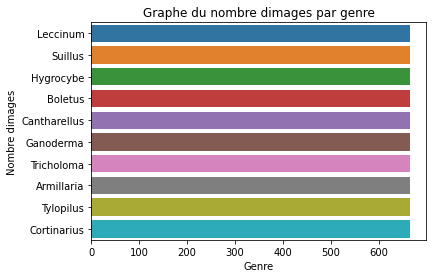


Numerically:
Leccinum        666
Suillus         666
Hygrocybe       666
Boletus         666
Cantharellus    666
Ganoderma       666
Tricholoma      666
Armillaria      666
Tylopilus       666
Cortinarius     666
Name: taxon_name, dtype: int64

min[imagePerGenus]:  666
max[imagePerGenus]:  666


Below the first rows of the train dataset:


,img_path,taxon_name
28971,/content/drive/MyDrive/work/Oliv/images/Suillus/356174.jpg,Suillus
8041,/content/drive/MyDrive/work/Oliv/images/Cortinarius/69546.jpg,Cortinarius
4595,/content/drive/MyDrive/work/Oliv/images/Boletus/296436.jpg,Boletus
29935,/content/drive/MyDrive/work/Oliv/images/Tricholoma/222101.jpg,Tricholoma
28771,/content/drive/MyDrive/work/Oliv/images/Suillus/102153.jpg,Suillus


In [18]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Controlling Images per Genus in TRAIN dataset
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

from datasource.dataframe.genus.selection import displayImagesPerGenus, limit_images_per_genus

# Limiting number of images per genus and ensuring all genus are fairly represented
limit_images_per_genus(X_train, MAX_IMAGES_PER_GENUS)

# Affichage du nombre d'images par Genus
print('Controlling images per Genus for df_genus dataset:\n')
displayImagesPerGenus(X_train)

# Keeping only the feature (img_path) and the target (taxon_name) on each dataframes
X_train = X_train[['img_path','taxon_name']]
X_valid = X_valid[['img_path','taxon_name']]
X_test  = X_test[['img_path','taxon_name']]

# Displaying the first rows of the train dataset
pd.set_option('display.max_colwidth', None)
print('\nBelow the first rows of the train dataset:')
X_train.head()

# Backing up Settings

# Building Image Dataset

**CAUTION**

---

**EfficientNet** models:  
   The preprocessing logic has been included in the efficientnet model implementation. 
   Users are no longer required to a input_preprocess_input function to normalize the input data. 

---

## Build Image Generators

### Image Generators Settings

In [19]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Image Generators Settings
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

TRAIN_IMAGE_GENERATOR_OPTS = TRAIN_IMAGE_GENERATOR_SETTINGS
VALID_IMAGE_GENERATOR_OPTS = VALID_IMAGE_GENERATOR_SETTINGS

### Build Image Generators

In [20]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Build Image Generators
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def buildImageGenerator(settings):
    if settings is None:
        return tf.keras.preprocessing.image.ImageDataGenerator()
    return tf.keras.preprocessing.image.ImageDataGenerator(**settings)

print('Building image generators ...')
train_datagen = buildImageGenerator(TRAIN_IMAGE_GENERATOR_OPTS)
valid_datagen = buildImageGenerator(VALID_IMAGE_GENERATOR_OPTS)
print('Done.')

Building image generators ...
Done.


### Back up image generators Settings

In [21]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Back up dataset settings
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
'''
model_output_run_dir = PATH_SETTINGS.get('MODEL_OUPUT_RUN_PATH')
outPath = os.path.join(model_output_run_dir, 'settings')

IMAGE_GENERATOR_SETTINGS = {
        'train_settings': TRAIN_GENERATOR_OPTS
    ,   'valid_settings': VALID_GENERATOR_OPTS
    ,   'test_settings' : TEST_GENERATOR_OPTS
}

print('Backing up image generators settings...')
filePath = os.path.join(outPath, 'image_generators_settings.json')
saveSettings(filePath, IMAGE_GENERATOR_SETTINGS)
'''
pass

## Batch Datasets

Here we will generate batches of dataset containing the image & labels

### Batch Datasets Settings

In [22]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Batch Datasets Settings
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

IMAGE_ROOT_DIR = '/content/drive/MyDrive/work/Oliv/images'

# TRAIN
TRAIN_BATCH_DATASET_OPTS = TRAIN_DATASET_SETTINGS
# VALID
VALID_BATCH_DATASET_OPTS = VALID_DATASET_SETTINGS

### Back up Dataset Settings

In [23]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Back up dataset settings
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
'''
model_output_run_dir = PATH_SETTINGS.get('MODEL_OUPUT_RUN_PATH')
outPath = os.path.join(model_output_run_dir, 'settings')

DATASET_SETTINGS = {
        'target_image_shape'      : TARGET_IMAGE_SHAPE
    ,   'target_color_mode'       : TARGET_COLOR_MODE
    ,   'epochs'                  : EPOCHS
    ,   'batch_size'              : BATCH_SIZE
    ,   'batch_dataset_train_seed': BATCH_DATASET_TRAIN_SEED
    ,   'batch_dataset_valid_seed': BATCH_DATASET_VALID_SEED
    ,   'batch_dataset_test_seed' : BATCH_DATASET_TEST_SEED
    ,   'split': {
                'split_valid_ratio': SPLIT_VALID_RATIO
            ,   'split_test_ratio' : SPLIT_TEST_RATIO
            ,   'split_seed_1'     : SPLIT_SEED_1
            ,   'split_seed_2'     : SPLIT_SEED_2
    }    
}


print('Backing up dataset settings...')
filePath = os.path.join(outPath, 'dataset_settings.json')
saveSettings(filePath, DATASET_SETTINGS)
'''
pass

### Build Batch Datasets

In [24]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Build Batch Datasets
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

print('\nBuild batch datasets ...')

# TRAIN dataset
#
train_batch_ds = train_datagen.flow_from_dataframe(
        dataframe = X_train
    ,   **TRAIN_BATCH_DATASET_OPTS
)
print('[TRAIN] batch dataset: built !')

# VALID dataset
#
valid_batch_ds = valid_datagen.flow_from_dataframe(
        dataframe = X_valid
    ,   **VALID_BATCH_DATASET_OPTS
)
print('[VALID] batch dataset: built !')


Build batch datasets ...
Found 6660 non-validated image filenames belonging to 10 classes.
[TRAIN] batch dataset: built !
Found 965 non-validated image filenames belonging to 10 classes.
[VALID] batch dataset: built !


# Pre-train operations

## Determine Train Id

In [25]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Determine Train ID
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def getTrainId(trainRootPath):

    def formatStrId(id):
        return id.zfill(4)
    
    def formatId(id):
        if isinstance(id, str):
            return formatStrId(id)
        elif isinstance(id, int):
            return formatStrId(str(id))
        else:
            raise TypeError('Invalid type for parameter <id>: <integer> or <string> type is expected.')        

    trainId = 1

    if not trainRootPath:
        raise ValueError('Incorrect value for <trainRootPath> argument: a non empty string is expected.')

    if not os.path.isdir(trainRootPath):
        return formatId(trainId)
    
    while True:
        if trainId == 9999:
            raise Error(f'The number of trains have already been exhausted for this model !')
        strTrainId = formatId(trainId)
        dirPath    = os.path.join(trainRootPath, strTrainId)
        if not os.path.isdir(dirPath):
            return strTrainId
        trainId += 1
    # Ne devrait jamais etre atteint
    return None


# Retrieve settings
trainRootPath = os.path.join(HP_TUNING_OUTPUT_PATH, 'train')

# Determine the ID for the train of the model
print('Determine the Train Id:')
TRAIN_ID = getTrainId(trainRootPath)
print(f'   TRAIN_ID: {TRAIN_ID}')

# Setting the TRAIN_RUN_PATH
TRAIN_RUN_PATH = os.path.join(trainRootPath, TRAIN_ID)
print(f'   TRAIN_RUN_PATH: {TRAIN_RUN_PATH}')

Determine the Train Id:
   TRAIN_ID: 0001
   TRAIN_RUN_PATH: /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0001/train/0001


## Build Arborescence

In [26]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Build Arborescence
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def create_dir_if_not_exist(dirPath):
    if isinstance(dirPath, str):
        if len(dirPath) > 0:
            if not os.path.exists(dirPath):
                os.makedirs(dirPath)
                print(f'created: {dirPath}')                

# Create arborescence for train output
#
print('\nCreating arborescence for train outputs...')

subDirs = [
        'model'
    ,   'log'
    ,   'result'
]

create_dir_if_not_exist(TRAIN_RUN_PATH)
for subDir in subDirs:
    create_dir_if_not_exist(os.path.join(TRAIN_RUN_PATH, subDir))

print('Done.\n')


Creating arborescence for train outputs...
created: /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0001/train/0001
created: /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0001/train/0001/model
created: /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0001/train/0001/log
created: /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0001/train/0001/result
Done.



## Setting up callbacks

### [callback]: ModelCheckpoint

Callback to save the Keras model or model weights at some frequency.

**ModelCheckpoint** callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

A few options this callback provides include:

   * Whether to only keep the model that has achieved the "best performance" so far, or whether to save the model at the end of every epoch regardless of performance.

   * Definition of 'best'
     which quantity to monitor and whether it should be maximized or minimized.

   * The frequency it should save at. 
     Currently, the callback supports saving at the end of every epoch, or after a fixed number of training batches.

   * Whether only weights are saved, or the whole model is saved.

NOTE:  
   If you get WARNING:tensorflow:Can save best model only with <name> available, skipping see the description of the monitor argument for details on how to get this right.

In [27]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# [callback] ModelCheckpoint
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

outPath = os.path.join(TRAIN_RUN_PATH, 'model')
BEST_MODEL_FILEPATH = os.path.join(outPath, 'best_model.h5')

# This callback will be used to save model everytime val_accuracy increases
clbk_modelChkpt = tf.keras.callbacks.ModelCheckpoint(
        filepath          = BEST_MODEL_FILEPATH
   ,    monitor           = 'val_accuracy'
   ,    save_weights_only = False
   ,    mode              = 'max'
   ,    save_freq         = 'epoch'
   ,    save_best_only    = True
   ,    verbose           = 1
)

### [callback]: ReduceLearningRate

Reduce learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates.  
This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [28]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# [callback]: Reduce Learning Rate callback
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

clbck_reduceLearningRate = tf.keras.callbacks.ReduceLROnPlateau(
     monitor  = 'val_loss'
   , factor   = 0.5
   , patience = 4
   , min_lr   = 0.0001
   , verbose  = 1
)

### [callback]: EarlyStopping

**EarlyStopping**

Stop training when a monitored metric has stopped improving.

Assuming the goal of a training is to minimize the loss.  
With this, the metric to be monitored would be 'loss', and mode would be 'min'.  
A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable.  
Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.

The quantity to be monitored needs to be available in logs dict.  
To make it so, pass the loss or metrics at model.compile().

In [29]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# [callback] EarlyStopping
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

clbk_earlyStopping = tf.keras.callbacks.EarlyStopping(
        monitor              = 'val_loss'
    ,   min_delta            = 0
    ,   patience             = 4
    ,   verbose              = 0
    ,   mode                 = 'min'
    ,   baseline             = None
    ,   restore_best_weights = False
)

### [callback]: TerminateOnNaN

**TerminateOnNan**

Callback that terminates training when a NaN loss is encountered.

In [30]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# [callback]: TerminateOnNan
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

clbk_terminateOnNan = tf.keras.callbacks.TerminateOnNaN()

### [callback]: CSVLogger

**CSVLogger**

Callback that streams epoch results to a CSV file.

Supports all values that can be represented as a string, including 1D iterables such as np.ndarray.

In [31]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# [callback]: CSVLogger
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

outPath = os.path.join(TRAIN_RUN_PATH, 'log')

clbk_csvLogger = tf.keras.callbacks.CSVLogger(
        os.path.join(outPath, 'log.csv')
    ,   separator = '|'
    ,   append    = False
)

## Declare the callbacks to be used

In [32]:
modelClbks = [ 
        clbk_earlyStopping
    ,   clbk_modelChkpt
    ,   clbck_reduceLearningRate
    ,   clbk_terminateOnNan
    ,   clbk_csvLogger
]

# Train Model

In [33]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Training the model
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

from utils import strCurrentTime

print('BEGIN time: ', strCurrentTime(LOCAL_TIMEZONE))

begTime = time()

model_training_history = model.fit(
     x                   = train_batch_ds
   , steps_per_epoch     = train_batch_ds.samples // train_batch_ds.batch_size
   , validation_data     = valid_batch_ds
   , validation_steps    = valid_batch_ds.samples // valid_batch_ds.batch_size
   , epochs              = EPOCHS
   , callbacks           = [modelClbks]
   , workers             = 4
#   , use_multiprocessing = False
)

endTime = time()
fitDuration_sec = endTime - begTime

print('END time: ', strCurrentTime(LOCAL_TIMEZONE))

print('FIT duration (seconds): ', fitDuration_sec)

BEGIN time:  2021-07-11 22:48:11
Epoch 1/100
208/208 [==============================] - 910s 4s/step - loss: 1.9141 - accuracy: 0.3626 - top_2_accuracy: 0.5505 - top_5_accuracy: 0.8460 - val_loss: 1.2700 - val_accuracy: 0.5437 - val_top_2_accuracy: 0.7375 - val_top_5_accuracy: 0.9333

Epoch 00001: val_accuracy improved from -inf to 0.54375, saving model to /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0001/train/0001/model/best_model.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
208/208 [==============================] - 68s 324ms/step - loss: 1.6397 - accuracy: 0.4225 - top_2_accuracy: 0.6148 - top_5_accuracy: 0.8867 - val_loss: 1.2218 - val_accuracy: 0.5719 - val_top_2_accuracy: 0.7479 - val_top_5_accuracy: 0.9469

Epoch 00002: val_accuracy improved from 0.54375 to 0.57187, saving model to /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0001/train/0001/model/best_model.h5
Epoch 3/100
208/208 [==============================] - 65s 308ms/step - loss: 1.5726 - accuracy: 0.4458 - top_2_accuracy: 0.6405 - top_5_accuracy: 0.8967 - val_loss: 1.1806 - val_accuracy: 0.5896 - val_top_2_accuracy: 0.7646 - val_top_5_accuracy: 0.9375

Epoch 00003: val_accuracy improved from 0.57187 to 0.58958, saving model to /content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0001/train/0001/model/best_model.h5
Epoch 4/100
208/208 [==============================] - 67s 316ms/step - loss: 1.5107 - accuracy: 0.4742 - to

# Analyzing model training history

## Model training history content

In [34]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Model training history content
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Retrieving model training history
history = model_training_history.history

# List all data in history
print('Content data from model training history:')
print(history.keys())

Content data from model training history:
dict_keys(['loss', 'accuracy', 'top_2_accuracy', 'top_5_accuracy', 'val_loss', 'val_accuracy', 'val_top_2_accuracy', 'val_top_5_accuracy', 'lr'])


## Visualizing Model Training History

The plots can provide an indication of useful things about the training of the model, such as:
   * Its speed of convergence over epochs (slope).
   * Whether the model may have already converged (plateau of the line).
   * Whether the mode may be over-learning the training data (inflection for validation line).

Displaying the following metrics for the TRAIN and VALIDATION datasets during model training:

*** [ Loss ]:


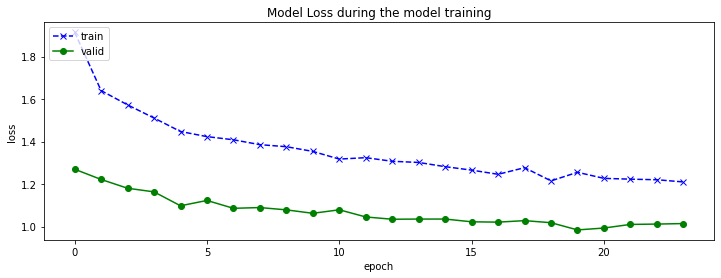

*** [ Accuracy ]:


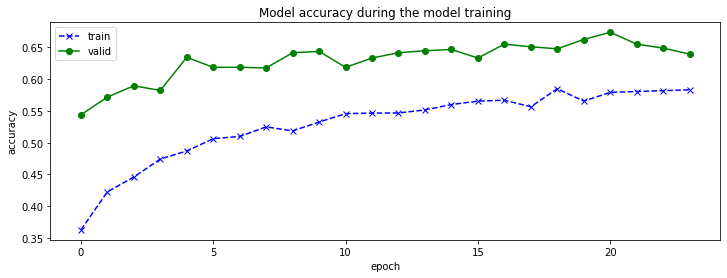

*** [ top_2_accuracy ]:


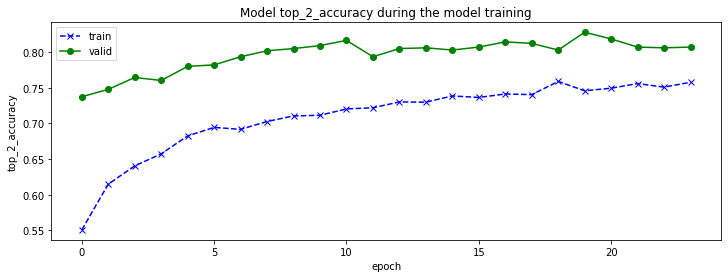

*** [ top_5_accuracy ]:


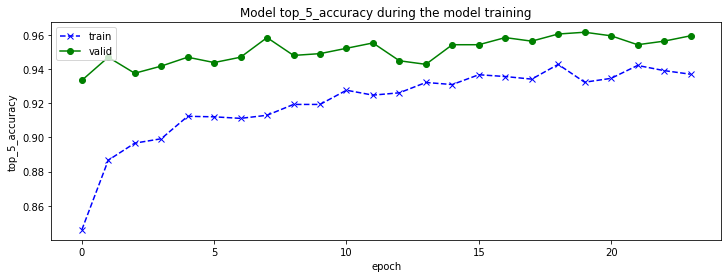

*** [ Learning Rate ]:


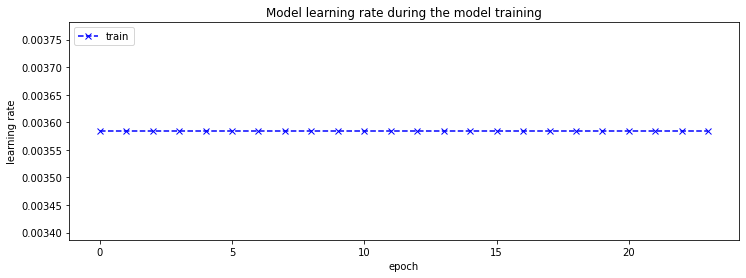

In [35]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Visualizing Model Training History
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Retrieving model training history
history = model_training_history.history

print('Displaying the following metrics for the TRAIN and VALIDATION datasets during model training:\n')

for key in history.keys():

    # LOSS    
    if key == 'loss':
        print('*** [ Loss ]:')
        plt.figure(figsize=(12,4))
        plt.plot(history['loss'], 'bx--', label = 'train')
        if 'val_loss' in history.keys():
            plt.plot(history['val_loss'], 'go-' , label = 'valid')
        plt.title('Model Loss during the model training')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.legend(loc = 'upper left')
        plt.show()

    # ACCURACY
    if key == 'accuracy':
        print('*** [ Accuracy ]:')
        plt.figure(figsize=(12,4))
        plt.plot(history['accuracy'], 'bx--', label = 'train')
        if 'val_accuracy' in history.keys():
            plt.plot(history['val_accuracy'], 'go-' , label = 'valid')
        plt.title('Model accuracy during the model training')
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(loc = 'upper left')
        plt.show()
    
    # TOP K ACCURACY
    r = re.compile('top_[0-9]+_accuracy')
    matchKey = r.match(key)
    if matchKey:
        matchKey = matchKey.group()
        print(f'*** [ {matchKey} ]:')
        plt.figure(figsize=(12,4))
        plt.plot(history[matchKey], 'bx--', label = 'train')        
        valMatchKey = 'val_' + matchKey
        if valMatchKey in history.keys():
            plt.plot(history[valMatchKey], 'go-' , label = 'valid')
        plt.title(f'Model {matchKey} during the model training')
        plt.xlabel('epoch')
        plt.ylabel(f'{matchKey}')
        plt.legend(loc = 'upper left')
        plt.show()

    # LEARNING RATE
    if key == 'lr':
        print('*** [ Learning Rate ]:')
        plt.figure(figsize=(12,4))
        plt.plot(history['lr'], 'bx--', label = 'train')
        plt.title('Model learning rate during the model training')
        plt.xlabel('epoch')
        plt.ylabel('learning rate')
        plt.legend(loc = 'upper left')
        plt.show()


# Retrieve the best model

## Load the best model

Here we will retrieve the best model as determined during the training.
The callback ModelCheckpoint must have been used during the training, because this is this callback that will be in charge of saving the best model as determined during the training.
This callback should have saved the best model in <BEST_MODEL_FILEPATH> file.

In [36]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Load the best model
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

if os.path.isfile(BEST_MODEL_FILEPATH):
    print(f'Best model (as determined by the training) found in the following file:\n{BEST_MODEL_FILEPATH}')
else:
    raise FileNotFoundError(f'File not found: {BEST_MODEL_FILEPATH}\nUnable to find the file containing the best model')

# Loading the best model
bestModel = tf.keras.models.load_model(filepath = BEST_MODEL_FILEPATH)

print('Best model loaded successfully !')

Best model (as determined by the training) found in the following file:
/content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0001/train/0001/model/best_model.h5
Best model loaded successfully !


## Best model summary

In [37]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Best model summary
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Printing the model summary
bestModel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 256, 256, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

# Evaluate the model

## Image Generator

In [38]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Image Generator
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

TEST_IMAGE_GENERATOR_OPTS = None

test_datagen = buildImageGenerator(TEST_IMAGE_GENERATOR_OPTS)

## Batch Dataset

In [39]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Batch Dataset
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

IMAGE_ROOT_DIR = '/content/drive/MyDrive/work/Oliv/images'

# Settings for TEST dataset
#
TEST_BATCH_DATASET_OPTS = TRAIN_BATCH_DATASET_OPTS
TEST_BATCH_DATASET_OPTS['directory']          = IMAGE_ROOT_DIR
TEST_BATCH_DATASET_OPTS['batch_size']         = TEST_BATCH_SIZE
TEST_BATCH_DATASET_OPTS['shuffle']            = TEST_SHUFFLE
TEST_BATCH_DATASET_OPTS['seed']               = TEST_SEED
TEST_BATCH_DATASET_OPTS['save_to_dir']        = None
TEST_BATCH_DATASET_OPTS['subset']             = None
TEST_BATCH_DATASET_OPTS['validate_filenames'] = False
        
# TEST dataset
#
test_batch_ds = valid_datagen.flow_from_dataframe(
        dataframe = X_test
    ,   **TEST_BATCH_DATASET_OPTS
)
print('*** [TEST] batch dataset: built !')

Found 1929 non-validated image filenames belonging to 10 classes.
*** [TEST] batch dataset: built !


## Evaluate the model

In [40]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Evaluate the model
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

steps = math.ceil(test_batch_ds.samples / test_batch_ds.batch_size)

score = model.evaluate(
        x               = test_batch_ds
    ,   steps           = steps
    ,   return_dict     = True
    ,   callbacks       = None
#    ,   max_queue_size = 10
    ,   workers         = 4
#    ,   use_multiprocessing = False
    ,   verbose         = 1
)

61/61 [==============================] - 215s 4s/step - loss: 0.9921 - accuracy: 0.6537 - top_2_accuracy: 0.8217 - top_5_accuracy: 0.9570


# Analyze the model evaluation result

## Displaying score content

In [41]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Displaying score content
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

print(f'Score content:\n{json.dumps(score, indent=3)}')

Score content:
{
   "loss": 0.9921411275863647,
   "accuracy": 0.6537066102027893,
   "top_2_accuracy": 0.8216692805290222,
   "top_5_accuracy": 0.9569725394248962
}


## Displaying accuracies

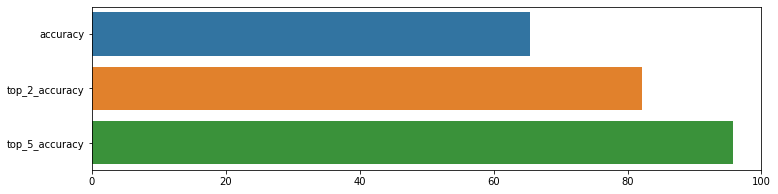

In [42]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Displaying accuracies
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

metricNames = []
metrics     = []

regex = re.compile('accuracy')

for metricName in score.keys():
    if regex.search(metricName):
        metric = score.get(metricName)
        if metric:
            metricNames.append(metricName)
            metrics.append(metric * 100)

if len(metrics) > 0:
    plt.figure(figsize=(12, 3))
    sns.barplot(
            x = metrics
        ,   y = metricNames
    )
    plt.xlim(0,100)
    plt.show()

## Predictions

In [43]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Predictions
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

pred_probas = model.predict(
        x               = test_batch_ds
    ,   workers         = 4
    ,   verbose         = 1
#    ,   max_queue_size  = 10
#    ,  use_multiprocessing = False 
)

61/61 [==============================] - 7s 84ms/step


# Retrieve class indexes, class names and class probas

In [44]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Retrieve class indexes, class names and class probas
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

classNames = []

for i in range(max(test_batch_ds.class_indices.values()) + 1):
    classNames.append(None)

print('Class names:')
for idx, className in enumerate(test_batch_ds.class_indices):
    classNames[idx] = className
    print(f'[{idx}]: {className}')

print(f'\nNumber of classes: {len(classNames)}')

real_classes = test_batch_ds.classes
pred_classes = pred_probas.argmax(axis=1)

real_classNames = list(map(lambda x: classNames[x], real_classes))
pred_classNames = list(map(lambda x: classNames[x], pred_classes))

CLASS_NAMES = classNames
NB_CLASSES  = len(classNames)

Class names:
[0]: Armillaria
[1]: Boletus
[2]: Cantharellus
[3]: Cortinarius
[4]: Ganoderma
[5]: Hygrocybe
[6]: Leccinum
[7]: Suillus
[8]: Tricholoma
[9]: Tylopilus

Number of classes: 10


# Model evaluation analysis

## Classification report

In [45]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Classification report
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

print(skl.metrics.classification_report(real_classes, pred_classes, target_names = classNames))

              precision    recall  f1-score   support

  Armillaria       0.69      0.49      0.58       194
     Boletus       0.64      0.44      0.52       194
Cantharellus       0.81      0.72      0.76       193
 Cortinarius       0.58      0.55      0.57       192
   Ganoderma       0.73      0.85      0.78       191
   Hygrocybe       0.86      0.88      0.87       194
    Leccinum       0.68      0.71      0.69       196
     Suillus       0.55      0.71      0.62       191
  Tricholoma       0.47      0.70      0.56       192
   Tylopilus       0.64      0.47      0.54       192

    accuracy                           0.65      1929
   macro avg       0.67      0.65      0.65      1929
weighted avg       0.67      0.65      0.65      1929



## Confusion Matrix

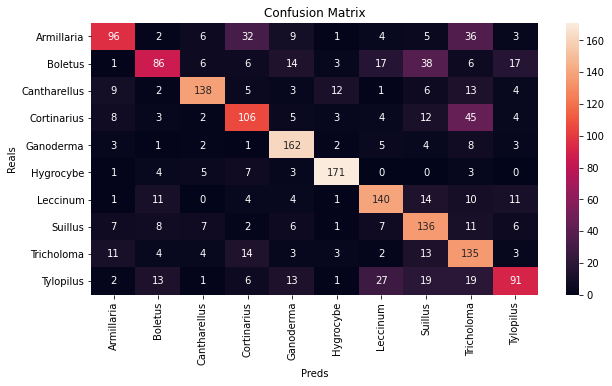

In [46]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Confusion Matrix
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Compute the confusion matrix
cm = skl.metrics.confusion_matrix(real_classes, pred_classes)

# Convert the confusion matrix to a DataFrame
df_cm = pd.DataFrame(
        data    = cm
    ,   index   = classNames
    ,   columns = classNames
    ,   dtype = 'int64'
)

# Displaying the confusion matrix
plt.figure(figsize = (10,5))
sns.heatmap(df_cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Preds')
plt.ylabel('Reals')
plt.show()

## Class ranking

### TOP Classes - (metric: accuracy)

TOP Classes


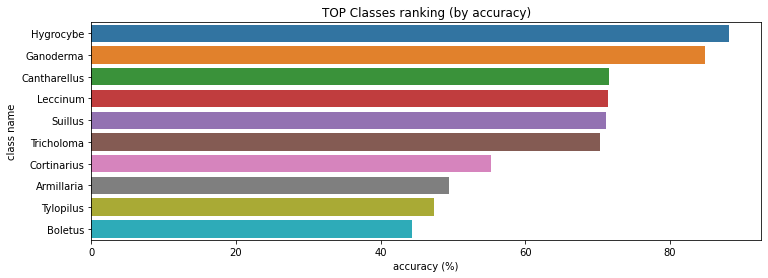

In [47]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# TOP Classes - (metric: accuracy)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# This cell computes the accuracies performed by the (best) model for each class.
# The metric that will be considered in this cell is : ACCURACY
# Then classes are displayed according to their respective metric, showing the best ones first.

eye = np.eye(NB_CLASSES, NB_CLASSES, dtype = np.int64)
 
accuracies = cm * eye / cm.sum(axis = 1) * 100
accuracies = accuracies.sum(axis = 1)
accuracies = pd.Series(data = accuracies, index = classNames)

s = accuracies.sort_values(ascending = False, inplace = False, ignore_index = False)

print('TOP Classes')
plt.figure(figsize=(12, 4))
sns.barplot(x = s, y = s.index.values)
plt.title('TOP Classes ranking (by accuracy)')
plt.xlabel('accuracy (%)')
plt.ylabel('class name')
plt.show()

del eye
del accuracies
del s

### WORST Classes - (errors not in Top-5-accuracy)

WORST Classes - (pct of errors not in Top-5 per class)


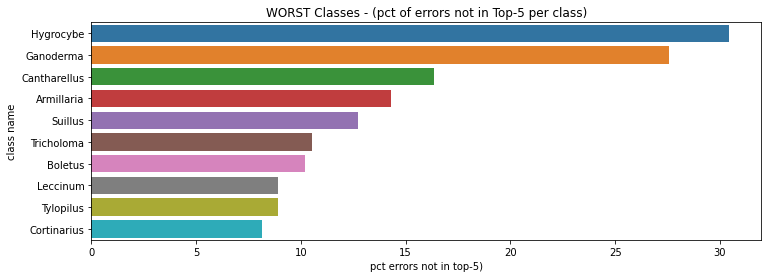

In [48]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# WORST Classes - (metric: top-5-accuracy)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# This cell computes the accuracies performed by the (best) model for each class.
# The metric that will be considered in this cell is : TOP-5-ACCURACY
# Then classes are displayed according to their respective metric, showing the worst ones first.

def notInTop5(row):
    global real_classes    

    topRank        = 5 
    idx            = row.name
    real_class     = real_classes[idx]
    baseline_proba = row[real_class]
    sorted_probas  = row.sort_values(ascending = False, inplace = False, ignore_index = False)[:5]
    last_proba     = sorted_probas.iloc[-1]
    row_copy       = row.copy()
    for i in range(len(row)):
        row_copy.iloc[i] = 0
    if baseline_proba < last_proba:
        row_copy[real_class] = 1
    return row_copy
 

predictions = pd.DataFrame(data = pred_probas)

top5res = predictions.apply(notInTop5, axis = 1)
top5res = top5res.sum(axis = 0)

mask = np.ones(shape=(NB_CLASSES, NB_CLASSES), dtype='int64')
np.fill_diagonal(mask, 0, wrap = False)
errors = cm * mask
errors = errors.sum(axis = 1)

top5res = top5res / errors * 100

top5res = pd.Series( data = top5res.values, index = classNames)
top5res = top5res.sort_values(ascending = False, inplace = False, ignore_index = False)

print('WORST Classes - (pct of errors not in Top-5 per class)')
plt.figure(figsize=(12, 4))
sns.barplot(x = top5res, y = top5res.index.values)
plt.title('WORST Classes - (pct of errors not in Top-5 per class)')
plt.xlabel('pct errors not in top-5)')
plt.ylabel('class name')
plt.show()

# Save Train Results

## Back up the training context

In [49]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Back up Training Context
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

import copy

def getValue(values):
    '''
    DESCRIPTION
        This function will return the first non None value stored inside <values>.
        Caution that, this function will return None if all values are None inside <values> or None is given as 
        argument.
    '''
    if values is None:
        return None
    
    if not isinstance(values, list):
        raise TypeError('Invalid type for argument <values>: a <list> type is expected.')

    if len(values) == 0:
        return None
    
    result = None
    for i, value in enumerate(values):
        if value is not None:
            result = value
            break        
        continue
    
    return result
        


# Define the training context
#
trainCtxt = copy.deepcopy(CONTEXT)

trainCtxt['epochs']                   = EPOCHS
trainCtxt['max_images_per_genus']     = MAX_IMAGES_PER_GENUS
trainCtxt['image_generators']['test'] = TEST_IMAGE_GENERATOR_OPTS

# Retrieving the context corresponding to the best tuner
tunerId   = int(BEST_TRIAL['tuner_id'])
tunerCtxt = trainCtxt.pop('per_tuner', None)
# Preparing dataset_settings
if tunerCtxt:
    tunerCtxt  = tunerCtxt[tunerId]
    dsSettings = tunerCtxt.get('dataset_settings')
    if dsSettings:
        dsSettings['split'] = tunerCtxt.get('split')
        if TRAIN_BATCH_SIZE is not None:
            trainDsSettings = dsSettings['train']
            if trainDsSettings:
                trainDsSettings['batch_size'] = TRAIN_BATCH_SIZE
            else:
                raise Exception('Unable to adjust train "batch_size" entry inside tuner context. Please contact the administrator.')
        if VALID_BATCH_SIZE is not None:
            validDsSettings = dsSettings['valid']
            if validDsSettings:
                validDsSettings['batch_size'] = VALID_BATCH_SIZE
            else:
                raise Exception('Unable to adjust valid "batch_size" entry inside tuner context. Please contact the administrator.')
        # Test dataset settings
        dsSettings['test'] = TEST_BATCH_DATASET_OPTS
    else:
        raise Exception('Unable to retrieve "dataset_settings" entry inside tuner context. Please contact the administrator.')
    # Integrating dataset_settings inside train context
    trainCtxt['dataset_settings'] = dsSettings

#
# Back up the training context
#
dstPath  = os.path.join(TRAIN_RUN_PATH)

dstFilePath = os.path.join(dstPath, 'context.json')
with open(dstFilePath, 'w') as outFile:
    json.dump(trainCtxt, outFile)
print(f'Training context successfully exported to:\n{dstFilePath}')

Training context successfully exported to:
/content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0001/train/0001/context.json


## Save the model training history

In [50]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Saving the model training history
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

outPath = os.path.join(TRAIN_RUN_PATH, 'result')

# Retrieving model training history
history = model.history.history

if os.path.isdir(outPath):
    outFilePath = os.path.join(outPath, f'model_training_history.csv')
    pd.DataFrame(history).to_csv(outFilePath)
    print(f'Model training history saved in the following file:\n"{outFilePath}"')
else:
    raise Error(f'Directory not found: {outPath}')

Model training history saved in the following file:
"/content/drive/MyDrive/work/dad/output/classifier/multiclass/10/efficientnetb0/0001/train/0001/result/model_training_history.csv"


In [51]:
cm

array([[ 96,   2,   6,  32,   9,   1,   4,   5,  36,   3],
       [  1,  86,   6,   6,  14,   3,  17,  38,   6,  17],
       [  9,   2, 138,   5,   3,  12,   1,   6,  13,   4],
       [  8,   3,   2, 106,   5,   3,   4,  12,  45,   4],
       [  3,   1,   2,   1, 162,   2,   5,   4,   8,   3],
       [  1,   4,   5,   7,   3, 171,   0,   0,   3,   0],
       [  1,  11,   0,   4,   4,   1, 140,  14,  10,  11],
       [  7,   8,   7,   2,   6,   1,   7, 136,  11,   6],
       [ 11,   4,   4,  14,   3,   3,   2,  13, 135,   3],
       [  2,  13,   1,   6,  13,   1,  27,  19,  19,  91]])

In [52]:
U = np.triu(cm)
np.fill_diagonal(U, 0)

L = np.tril(cm)
np.fill_diagonal(L, 0)

Z = U + L.T
Z

array([[ 0,  3, 15, 40, 12,  2,  5, 12, 47,  5],
       [ 0,  0,  8,  9, 15,  7, 28, 46, 10, 30],
       [ 0,  0,  0,  7,  5, 17,  1, 13, 17,  5],
       [ 0,  0,  0,  0,  6, 10,  8, 14, 59, 10],
       [ 0,  0,  0,  0,  0,  5,  9, 10, 11, 16],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  6,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 21, 12, 38],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 24, 25],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 22],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [53]:
np.argmax(Z, axis=1)

array([8, 7, 5, 8, 9, 8, 9, 9, 9, 0])